In [78]:
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy as dc

In [2]:
def generate_samples(n_samples: int, 
                     w: float = 1.0, 
                     b: float = 0.5,
                     x_range=[-1.0,1.0]):
    
    xs = np.random.uniform(low=x_range[0], high=x_range[1], size=n_samples)
    ys = w * xs + b
    return xs, ys

In [3]:
w = 1.0
b = 0.5
xs, ys = generate_samples(30, w=w, b=b)

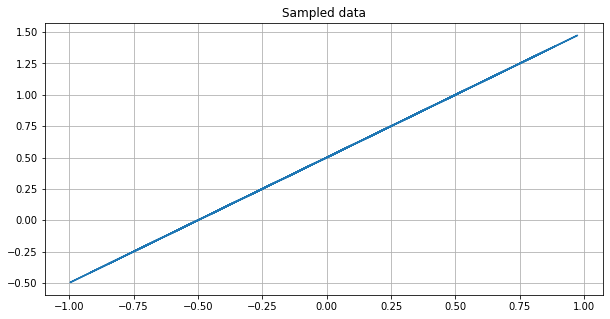

In [4]:
fig, ax = plt.subplots(1,1, figsize=(10, 5))
ax.grid()
ax.plot(xs, ys)
ax.set_title("Sampled data")
plt.show()

In [47]:
def get_prediction(xs, w, b):
    return w * xs + b

def get_loss(xs, ys, w, b):
    ys_hat = get_prediction(xs, w, b) 
    return np.linalg.norm(ys - ys_hat, axis=-1)

In [107]:
def get_partial_w(xs, ys, w, b):
    partial_w = -2 * np.sum(((ys - (w*xs + b)) * xs), axis=0)
    return partial_w

def get_partial_b(xs, ys, w, b):
    partial_b = -2 * np.sum(((ys - (w*xs + b))), axis=0)
    return partial_b

def grad_descent(xs, ys, w_init, b_init, 
                 alpha: float, # Learning rate 
                 num_steps: float): # Graident update steps
    w_hat = w_init
    b_hat = b_init
    
    w_hats = [w_hat]
    b_hats = [b_hat]
    for i in range(grad_updates):
        w_partial = get_partial_w(xs, ys, w_hat, b_hat)
        b_partial = get_partial_b(xs, ys, w_hat, b_hat)
        w_hat -= alpha * w_partial
        b_hat -= alpha * b_partial
        w_hats.append(w_hat)
        b_hats.append(b_hat)             
    return w_hats, b_hats

In [135]:
w_init = float(np.random.randn(1))
b_init = float(np.random.randn(1))
alpha = 0.01
num_steps = 50

w_hats, b_hats = grad_descent(xs, ys, w_init, b_init,
                             alpha=alpha,
                             num_steps=num_steps)

In [136]:
ws = np.linspace(-3.0, 3.0, 100)
bs = np.linspace(-3.0, 3.0, 100)
ww, bb = np.meshgrid(ws, bs)
ww_flattend = ww.reshape(-1,1)
bb_flattend = bb.reshape(-1,1)

In [137]:
losses = get_loss(xs, ys, ww_flattend,bb_flattend)
losses = losses.reshape(-1,100)

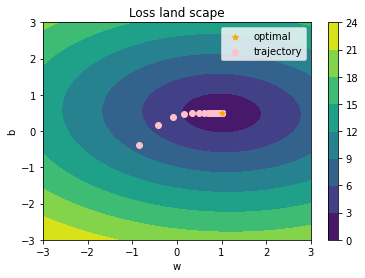

In [139]:
fig, ax=plt.subplots(1,1)
cp = ax.contourf(ww, bb, losses)
ax.scatter(w, b, 
           c='orange', marker='*', label='optimal', zorder=2)
ax.scatter(w_hats, b_hats, c='pink',
           marker='o', label='trajectory', zorder=1)
ax.set_title("Loss land scape")
ax.legend()
fig.colorbar(cp)
ax.set_xlabel('w')
ax.set_ylabel('b')
plt.show()

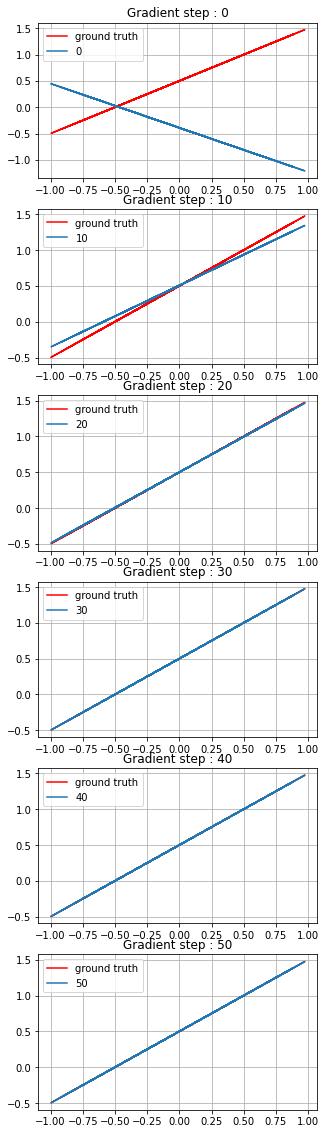

In [166]:
viz_every = 10

fig, ax = plt.subplots(len(w_hats[::viz_every]),1, figsize=(5, 2*viz_every))
for i, (w_hat, b_hat) in enumerate(zip(w_hats[::viz_every], b_hats[::viz_every])):
    grad_step = i * viz_every
    y_hat = get_prediction(xs, w_hat, b_hat)
    ax[i].grid()
    ax[i].plot(xs, ys, c='red', label='ground truth')
    ax[i].plot(xs, y_hat, label=grad_step)
    ax[i].legend()
    ax[i].set_title("Gradient step : {}".format(grad_step))